In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import os
import json
import math

In [5]:
with open('./exploration/example1/explorationMap.json') as f:
    data = json.load(f)

In [6]:
data.keys()

dict_keys(['start', 'end', 'path', 'denyList', 'openList', 'closedList'])

In [7]:
print('Num of iterations: ', len(data['openList']))
print('Path length: ', len(data['path']))
print('Num of nodes in the last open list: ', len(data['openList'][-1]))
print('Num of nodes in the last closed list: ', len(data['closedList'][-1]))

Num of iterations:  34
Path length:  33
Num of nodes in the last open list:  9
Num of nodes in the last closed list:  33


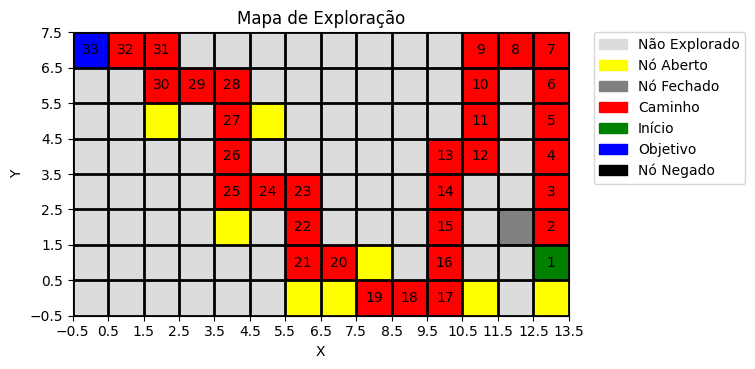

In [10]:
# plot map with the last iteration and path
# not explored is white 0
# open list is yellow 1
# closed list is gray 2
# path is red 3
# start is green 4
# goal is blue 5
# data = dict_keys(['start', 'end', 'path', 'denyList', 'openList', 'closedList'])
def plot_map(startPoint, goalPoint, path, openList, closedList, denyList):
    min_x = min_y = math.inf
    max_x = max_y = -math.inf

    for list_ in [openList, closedList, path, denyList]:
        for node in list_:
            min_x = min(min_x, node[0])
            min_y = min(min_y, node[2])
            max_x = max(max_x, node[0])
            max_y = max(max_y, node[2])

    min_x = min(min_x, startPoint[0], goalPoint[0])
    min_y = min(min_y, startPoint[2], goalPoint[2])
    max_x = max(max_x, startPoint[0], goalPoint[0])
    max_y = max(max_y, startPoint[2], goalPoint[2])

    map = np.zeros((int(max_x-min_x+1), int(max_y-min_y+1)))
    for node in openList:
        map[node[0]-min_x, node[2]-min_y] = 1

    for node in closedList:
        map[node[0]-min_x, node[2]-min_y] = 2

    for node in path:
        map[node[0]-min_x, node[2]-min_y] = 3

    for node in denyList:
        map[node[0]-min_x, node[2]-min_y] = 6

    map[startPoint[0]-min_x, startPoint[2]-min_y] = 4
    map[goalPoint[0]-min_x, goalPoint[2]-min_y] = 5

    # plot map
    cmap = colors.ListedColormap(['gainsboro', 'yellow', 'gray', 'red', 'green', 'blue', 'black'])
    bounds = [0, 1, 2, 3, 4, 5, 6, 7]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(map, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, map.shape[1], 1))
    ax.set_yticks(np.arange(-.5, map.shape[0], 1))
    
    # draw path order
    path_order = np.zeros((int(max_x-min_x+1), int(max_y-min_y+1)))
    for i in range(len(path)):
        path_order[path[i][0]-min_x, path[i][2]-min_y] = i+1
    
    for i in range(path_order.shape[0]):
        for j in range(path_order.shape[1]):
            if path_order[i,j] != 0:
                ax.text(j, i, int(path_order[i,j]), ha="center", va="center", color="black") 

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Mapa de Exploração')
    
    # legend color info, outside the plot
    labels = ['Não Explorado', 'Nó Aberto', 'Nó Fechado', 'Caminho', 'Início', 'Objetivo', 'Nó Negado']
    handles = [plt.Rectangle((0,0),1,1, color=cmap(i)) for i in range(7)]
    ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    

    ax.invert_yaxis()
    return fig, ax

index = -1
end = []
for x in range(len(data['end'][0])):
    med = (data['end'][0][x] + data['end'][1][x]) / 2
    end.append(int(med))

fig, ax = plot_map(data['start'], end, data['path'], 
                   data['openList'][index], data['closedList'][index], data['denyList'][index])
plt.show()

In [9]:
print('Start: ', data['start'])
print('End: ', end)

Start:  [-10, -60, 26]
End:  [-4, -60, 13]
